In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#parameter
Dr = 0.17
Dt = 0.2
omega = 0
v = 30
delta_t = 0.01
n_realizations = 5

#parameter for gaussian
mu = 0
sigma = np.sqrt(delta_t)

In [20]:
#Euler scheme
def euler_one_traj(N_time, mu, sigma, delta_t, Dr, Dt, omega):
    #initial condition
    theta_init = 0
    x_init = 0
    y_init = 0
    theta_traj = np.array([])
    x_traj = np.array([])
    y_traj = np.array([])
    
    theta = theta_init  
    x = x_init
    y = y_init
    theta_traj = np.append(theta_traj, theta)
    x_traj = np.append(x_traj, x)
    y_traj = np.append(y_traj, y)

    for i in range(N_time-1):
        s1 = np.random.normal(mu, sigma)
        s2 = np.random.normal(mu, sigma)
        s3 = np.random.normal(mu, sigma)
        theta = theta + omega*delta_t + np.sqrt(2*Dr)*s1
        x = x + v*np.cos(theta)*delta_t + np.sqrt(2*Dt)*s2
        y = y + v*np.sin(theta)*delta_t + np.sqrt(2*Dt)*s3
        
        theta_traj = np.append(theta_traj,theta)
        x_traj = np.append(x_traj, x)
        y_traj = np.append(y_traj, y)
    return theta_traj, x_traj, y_traj


In [21]:
def traj_n_realizations(n_realizations, t_max, Dt, omega):
    t_min = 0.0
    N_time = int((t_max-t_min)/delta_t +1)
    time = np.linspace(t_min, t_max, N_time)

    traj_theta_list = []
    traj_x_list = []
    traj_y_list = []
    for n in range(n_realizations):
        theta_traj, x_traj, y_traj = euler_one_traj(N_time, mu, sigma, delta_t, Dr, Dt, omega)
        traj_theta_list.append(theta_traj)
        traj_x_list.append(x_traj)
        traj_y_list.append(y_traj)
    return traj_theta_list, traj_x_list, traj_y_list, time

In [22]:
traj_theta_list, traj_x_list, traj_y_list, time = traj_n_realizations(n_realizations = 5, t_max = 10, Dt = 0.2, omega = 0)
traj_theta_list_1, traj_x_list_1, traj_y_list_1, time_1 = traj_n_realizations(n_realizations = 5, t_max = 10, Dt = 0.2, omega = 10)

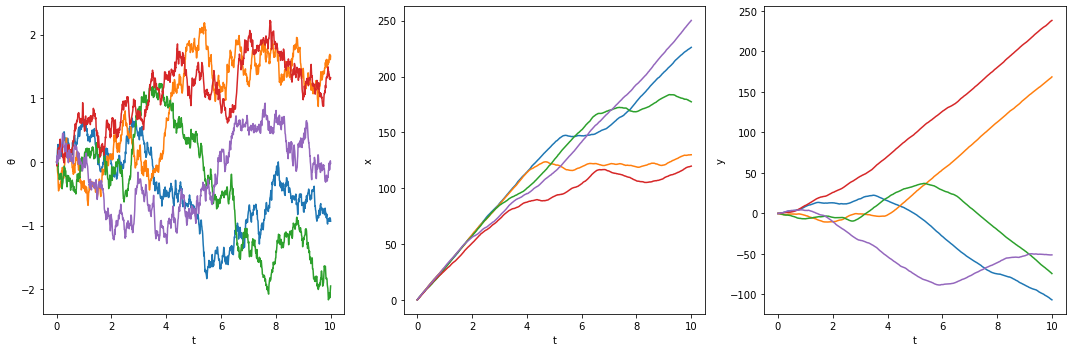

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in traj_theta_list:
    ax[0].plot(time, i)

for j in traj_x_list:
    ax[1].plot(time, j)
    
for k in traj_y_list:
    ax[2].plot(time, k)



ax[0].set_xlabel('t')
ax[0].set_ylabel('θ')
ax[1].set_xlabel('t')
ax[1].set_ylabel('x')
ax[2].set_xlabel('t')
ax[2].set_ylabel('y')

plt.tight_layout()
# plt.savefig('prob_1d_omega0_5.png', dpi=300)
plt.show()

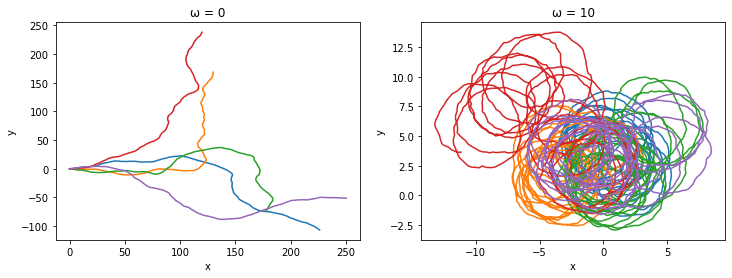

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(traj_x_list[0], traj_y_list[0])
ax[0].plot(traj_x_list[1], traj_y_list[1])
ax[0].plot(traj_x_list[2], traj_y_list[2])
ax[0].plot(traj_x_list[3], traj_y_list[3])
ax[0].plot(traj_x_list[4], traj_y_list[4])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('ω = 0')

ax[1].plot(traj_x_list_1[0], traj_y_list_1[0])
ax[1].plot(traj_x_list_1[1], traj_y_list_1[1])
ax[1].plot(traj_x_list_1[2], traj_y_list_1[2])
ax[1].plot(traj_x_list_1[3], traj_y_list_1[3])
ax[1].plot(traj_x_list_1[4], traj_y_list_1[4])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('ω = 10')
plt.savefig('x_vs_y.png', dpi=300)
plt.show()

end

In [ ]:
f = open("prob1d_trajtheta_omega=0.dat", "a")
g = open("prob1d_trajx_omega=0.dat", "a")
h = open("prob1d_trajy_omega=0.dat", "a")
i = open("prob1d_trajx_trajy_omega=0.dat", "a")
for i in range(len(traj_theta_list)):
    print(time[i],traj_theta_list[i],file=f)
for j in range(len(traj_x_list)):
    print(time[j],traj_x_list[j],file=g)
for k in range(len(traj_y_list)):
    print(time[k],traj_y_list[k],file=h)
for l in range(len(traj_y_list)):
    print(traj_x_list[l],traj_y_list[l],file=i)
f.close()
g.close()
h.close()
i.close()

In [ ]:
count = 1
for data in traj_theta_list:
    f = open("prob1d_trajtheta_omega=0_5data_"+str(count)+".dat", "a")
    for i in range(len(data)):
        print(time[i],data[i],file=f)
    f.close()
    count +=1

count = 1
list_a = []
for i in range(len(traj_theta_list)):
    a = 'prob1d_trajtheta_omega=0_5data_'+str(count)+'.dat'
    list_a.append(a)
    count = count+1
q = open("trajtheta_omega=0_5data", "a")
print('xmgrace', *list_a,file = q)
q.close()

count = 1
for data in traj_x_list:
    f = open("prob1d_trajx_omega=0_5data_"+str(count)+".dat", "a")
    for i in range(len(data)):
        print(time[i],data[i],file=f)
    f.close()
    count +=1

count = 1
list_a = []
for i in range(len(traj_x_list)):
    a = 'prob1d_trajx_omega=0_5data_'+str(count)+'.dat'
    list_a.append(a)
    count = count+1
q = open("trajx_omega=0_5data", "a")
print('xmgrace', *list_a,file = q)
q.close()

count = 1
for data in traj_y_list:
    f = open("prob1d_trajy_omega=0_5data_"+str(count)+".dat", "a")
    for i in range(len(data)):
        print(time[i],data[i],file=f)
    f.close()
    count +=1

count = 1
list_a = []
for i in range(len(traj_y_list)):
    a = 'prob1d_trajy_omega=0_5data_'+str(count)+'.dat'
    list_a.append(a)
    count = count+1
q = open("trajy_omega=0_5data", "a")
print('xmgrace', *list_a,file = q)
q.close()

count = 1
for data in traj_y_list:
    f = open("prob1d_trajx_trajy_omega=0_5data_"+str(count)+".dat", "a")
    for i in range(len(data)):
        print(time[i],data[i],file=f)
    f.close()
    count +=1

count = 1
list_a = []
for i in range(len(traj_y_list)):
    a = 'prob1d_trajx_trajy_omega=0_5data_'+str(count)+'.dat'
    list_a.append(a)
    count = count+1
q = open("trajx_trajy_omega=0_5data", "a")
print('xmgrace', *list_a,file = q)
q.close()